<a href="https://colab.research.google.com/github/ceying/DataSparsityProject_CreditStability/blob/main/HomeCreditStability_EDA_STOCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, balanced_accuracy_score

np.random.seed(0)

In [ ]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#Load Data

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_train.csv')

<ipython-input-4-f50ea29aabf0>:1: DtypeWarning: Columns (256,257,258,259,260,261,272,289,294,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,326,327,328,329,336,339,340,341,344,345) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/df_train.csv')


In [ ]:
full_balanced_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/full_balanced_df.csv')

<ipython-input-95-f6eb06f8cafc>:1: DtypeWarning: Columns (261,272,289,294,326,327) have mixed types. Specify dtype option on import or set low_memory=False.
  full_balanced_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/full_balanced_df.csv')


In [ ]:
full_results_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_full_results_df.csv')

In [ ]:
all_metrics = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/new_all_metrics.csv')

In [ ]:
threshold_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/merged_df.csv')

EDA for CLs


In [ ]:
all_metrics.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iteration   120 non-null    int64  
 1   Metric      120 non-null    object 
 2   Value_low   120 non-null    float64
 3   Value_mid   120 non-null    float64
 4   Value_high  120 non-null    float64
 5   Model       120 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
full_results_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   y_test              95990 non-null  int64  
 1   DT_y_pred_proba     95990 non-null  float64
 2   iteration           95990 non-null  int64  
 3   RF_y_pred_proba     95990 non-null  float64
 4   LGBM_y_pred_proba   95990 non-null  float64
 5   XGB_y_pred_proba    95990 non-null  float64
 6   completeness_level  95990 non-null  object 
 7   case_id             95990 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 5.9+ MB


In [ ]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 347 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    case_id                               int64  
 1    WEEK_NUM                              int64  
 2    target                                int64  
 3    month_decision                        int64  
 4    weekday_decision                      int64  
 5    credamount_770A                       float64
 6    applicationcnt_361L                   float64
 7    applications30d_658L                  float64
 8    applicationscnt_1086L                 float64
 9    applicationscnt_464L                  float64
 10   applicationscnt_867L                  float64
 11   clientscnt_1022L                      float64
 12   clientscnt_100L                       float64
 13   clientscnt_1071L                      float64
 14   clientscnt_1130L                      float64
 1

In [ ]:
full_balanced_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95988 entries, 0 to 95987
Data columns (total 349 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    case_id                               int64  
 1    WEEK_NUM                              int64  
 2    target                                int64  
 3    month_decision                        int64  
 4    weekday_decision                      int64  
 5    credamount_770A                       float64
 6    applicationcnt_361L                   float64
 7    applications30d_658L                  float64
 8    applicationscnt_1086L                 float64
 9    applicationscnt_464L                  float64
 10   applicationscnt_867L                  float64
 11   clientscnt_1022L                      float64
 12   clientscnt_100L                       float64
 13   clientscnt_1071L                      float64
 14   clientscnt_1130L                      float64
 15   

In [ ]:
full_results_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   y_test              95990 non-null  int64  
 1   DT_y_pred_proba     95990 non-null  float64
 2   iteration           95990 non-null  int64  
 3   RF_y_pred_proba     95990 non-null  float64
 4   LGBM_y_pred_proba   95990 non-null  float64
 5   XGB_y_pred_proba    95990 non-null  float64
 6   completeness_level  95990 non-null  object 
 7   case_id             95990 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 5.9+ MB


In [ ]:
threshold_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                20 non-null     object 
 1   metric               20 non-null     object 
 2   STO1_high_threshold  20 non-null     float64
 3   STO1_high_score      20 non-null     float64
 4   STO1_mid_threshold   20 non-null     float64
 5   STO1_mid_score       20 non-null     float64
 6   STO1_low_threshold   20 non-null     float64
 7   STO1_low_score       20 non-null     float64
 8   STO2_high_threshold  20 non-null     float64
 9   STO2_high_score      20 non-null     float64
 10  STO2_mid_threshold   20 non-null     float64
 11  STO2_mid_score       20 non-null     float64
 12  STO2_low_threshold   20 non-null     float64
 13  STO2_low_score       20 non-null     float64
 14  STO3_high_threshold  20 non-null     float64
 15  STO3_high_score      20 non-null     float

## Merge raw data to results

In [ ]:
# prompt: merge full_balanced_df to full_results_df on case_id

merged_df = pd.merge(full_balanced_df, full_results_df, on='case_id')
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 356 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    case_id                               int64  
 1    WEEK_NUM                              int64  
 2    target                                int64  
 3    month_decision                        int64  
 4    weekday_decision                      int64  
 5    credamount_770A                       float64
 6    applicationcnt_361L                   float64
 7    applications30d_658L                  float64
 8    applicationscnt_1086L                 float64
 9    applicationscnt_464L                  float64
 10   applicationscnt_867L                  float64
 11   clientscnt_1022L                      float64
 12   clientscnt_100L                       float64
 13   clientscnt_1071L                      float64
 14   clientscnt_1130L                      float64
 15   

In [ ]:
from pathlib import Path
ROOT            = Path("/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/")

TRAIN_DIR       = ROOT / "parquet_files" / "train"

In [ ]:
train_tmp = pd.read_parquet(TRAIN_DIR / 'train_person_1.parquet')
train_tmp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973991 entries, 0 to 2973990
Data columns (total 37 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   case_id                    int64  
 1   birth_259D                 object 
 2   birthdate_87D              object 
 3   childnum_185L              float64
 4   contaddr_district_15M      object 
 5   contaddr_matchlist_1032L   object 
 6   contaddr_smempladdr_334L   object 
 7   contaddr_zipcode_807M      object 
 8   education_927M             object 
 9   empl_employedfrom_271D     object 
 10  empl_employedtotal_800L    object 
 11  empl_industry_691L         object 
 12  empladdr_district_926M     object 
 13  empladdr_zipcode_114M      object 
 14  familystate_447L           object 
 15  gender_992L                object 
 16  housetype_905L             object 
 17  housingtype_772L           object 
 18  incometype_1044T           object 
 19  isreference_387L           object 
 20  la

In [ ]:
# prompt: calculate 'age' from train_tmp['birth_259D']

from datetime import datetime

# Assuming 'birth_259D' is a date column in the format YYYY-MM-DD
train_tmp['age'] = (pd.to_datetime(datetime.now().strftime('%Y-%m-%d')) - pd.to_datetime(train_tmp['birth_259D'])).dt.days // 365



In [ ]:
# prompt: create new df where train_tmp['age'] is not null

train_tmp_not_null = train_tmp[train_tmp['age'].notnull()]


In [ ]:
train_tmp_not_null.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1526659 entries, 0 to 2973990
Data columns (total 38 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   case_id                    1526659 non-null  int64  
 1   birth_259D                 1526659 non-null  object 
 2   birthdate_87D              12458 non-null    object 
 3   childnum_185L              0 non-null        float64
 4   contaddr_district_15M      1526659 non-null  object 
 5   contaddr_matchlist_1032L   1526218 non-null  object 
 6   contaddr_smempladdr_334L   1526218 non-null  object 
 7   contaddr_zipcode_807M      1526659 non-null  object 
 8   education_927M             1526659 non-null  object 
 9   empl_employedfrom_271D     566701 non-null   object 
 10  empl_employedtotal_800L    528315 non-null   object 
 11  empl_industry_691L         522236 non-null   object 
 12  empladdr_district_926M     1526659 non-null  object 
 13  empladdr_zipcode_

In [ ]:
train_tmp_not_null.head()

,case_id,birth_259D,birthdate_87D,childnum_185L,contaddr_district_15M,contaddr_matchlist_1032L,contaddr_smempladdr_334L,contaddr_zipcode_807M,education_927M,empl_employedfrom_271D,...,registaddr_zipcode_184M,relationshiptoclient_415T,relationshiptoclient_642T,remitter_829L,role_1084L,role_993L,safeguarantyflag_411L,sex_738L,type_25L,age
0,0,1986-07-01,None,NaN,P88_18_84,False,False,P167_100_165,P97_36_170,2017-09-15,...,P167_100_165,None,None,None,CL,None,True,F,PRIMARY_MOBILE,38.0
4,1,1957-08-01,None,NaN,P103_93_94,False,False,P176_37_166,P97_36_170,2008-10-29,...,P176_37_166,None,None,None,CL,None,True,M,PRIMARY_MOBILE,67.0
9,2,1974-12-01,None,NaN,P91_125_184,False,False,P161_5_97,P97_36_170,2010-02-15,...,P161_5_97,None,None,None,EM,None,True,F,PRIMARY_MOBILE,50.0
14,3,1993-08-01,None,NaN,P155_139_77,False,False,P161_14_174,P33_146_175,2018-05-15,...,P161_14_174,None,None,None,CL,None,True,F,PRIMARY_MOBILE,31.0
17,4,1994-01-01,None,NaN,P194_82_174,False,False,P8_88_79,P33_146_175,2014-12-15,...,P8_88_79,None,None,None,CL,None,True,F,PRIMARY_MOBILE,31.0


In [ ]:
# prompt: merge train_tmp_not_null['age'] to merged_df

merged_df = pd.merge(merged_df, train_tmp_not_null[['case_id', 'age']], on='case_id', how='left')


In [ ]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 357 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    case_id                               int64  
 1    WEEK_NUM                              int64  
 2    target                                int64  
 3    month_decision                        int64  
 4    weekday_decision                      int64  
 5    credamount_770A                       float64
 6    applicationcnt_361L                   float64
 7    applications30d_658L                  float64
 8    applicationscnt_1086L                 float64
 9    applicationscnt_464L                  float64
 10   applicationscnt_867L                  float64
 11   clientscnt_1022L                      float64
 12   clientscnt_100L                       float64
 13   clientscnt_1071L                      float64
 14   clientscnt_1130L                      float64
 15   

# Plots

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='completeness_level_x', ylabel='age'>

Text(0.5, 1.0, 'Distribution of Age per Completeness Level by Sex')

Text(0.5, 0, 'Completeness Level')

Text(0, 0.5, 'Age')

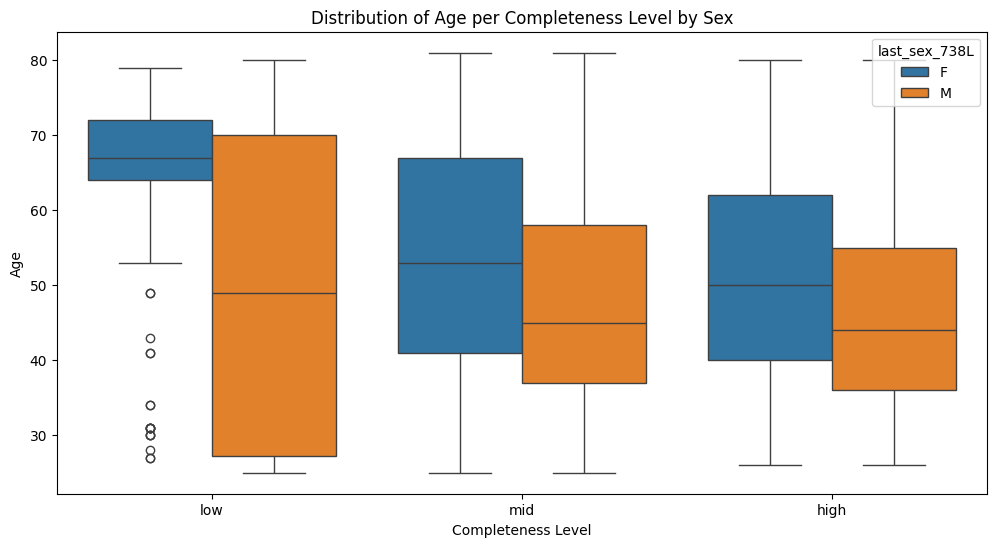

In [ ]:
# prompt: show distribution of age per completeness_level_x by 'last_sex_738_L'

plt.figure(figsize=(12, 6))
sns.boxplot(x='completeness_level_x', y='age', hue='last_sex_738L', data=merged_df)
plt.title('Distribution of Age per Completeness Level by Sex')
plt.xlabel('Completeness Level')
plt.ylabel('Age')
plt.show()


<Axes: xlabel='completeness_level_x'>

Text(0.5, 1.0, 'Count of Male vs. Female for each CL')

Text(0.5, 0, 'Completeness Level')

Text(0, 0.5, 'Count')

(array([0, 1, 2]), [Text(0, 0, 'low'), Text(1, 0, 'mid'), Text(2, 0, 'high')])

Text(0, 10, '97')

Text(0, 10, '4963')

Text(0, 10, '24131')

Text(0, 10, '74')

Text(0, 10, '3299')

Text(0, 10, '15562')

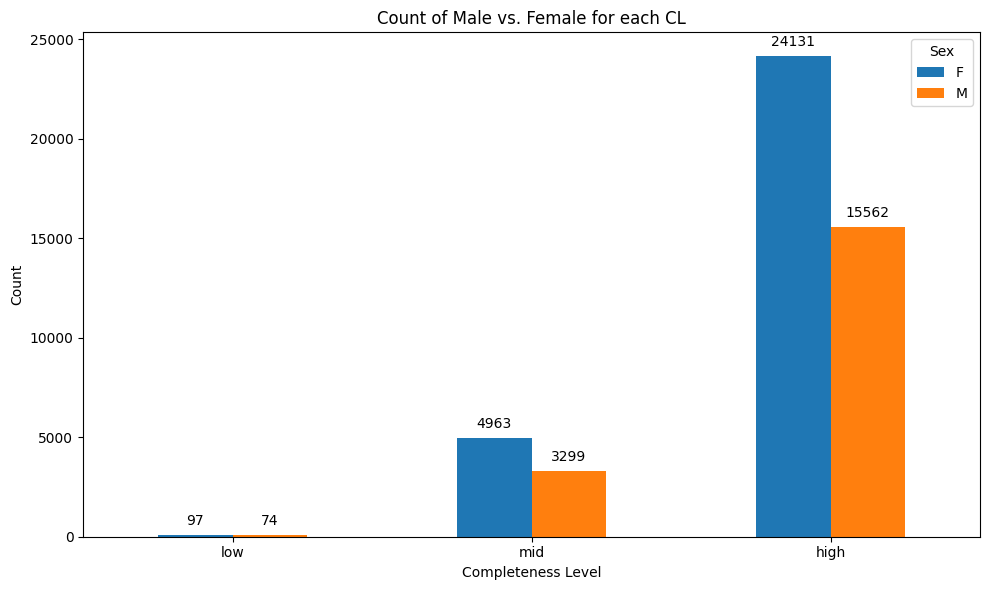

In [ ]:
# prompt: barchart of last_sex_738L for each completeness_level_x with count on top of bar, order by low, mid, high

import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
completeness_order = ['low', 'mid', 'high']
last_sex_counts = merged_df.groupby(['completeness_level_x', 'last_sex_738L']).size().unstack(fill_value=0)
last_sex_counts = last_sex_counts.reindex(completeness_order)

last_sex_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Male vs. Female for each CL')
plt.xlabel('Completeness Level')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Sex')
plt.tight_layout()
plt.show()


Text(0, 98, '97')

Text(1, 75, '74')

Text(2, 4964, '4963')

Text(3, 3300, '3299')

Text(4, 24132, '24131')

Text(5, 15563, '15562')

Text(0.0, 42.0, '84')

Text(1.0, 20.5, '41')

Text(2.0, 1365.0, '2730')

Text(3.0, 736.0, '1472')

Text(4.0, 6626.5, '13253')

Text(5.0, 3608.5, '7217')

Text(0.0, 90.5, '13')

Text(1.0, 57.5, '33')

Text(2.0, 3846.5, '2233')

Text(3.0, 2385.5, '1827')

Text(4.0, 18692.0, '10878')

Text(5.0, 11389.5, '8345')

Text(0.5, 0, 'Completeness Level')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of target for each CL (male vs. female)')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(low, F)'),
  Text(1, 0, '(low, M)'),
  Text(2, 0, '(mid, F)'),
  Text(3, 0, '(mid, M)'),
  Text(4, 0, '(high, F)'),
  Text(5, 0, '(high, M)')])

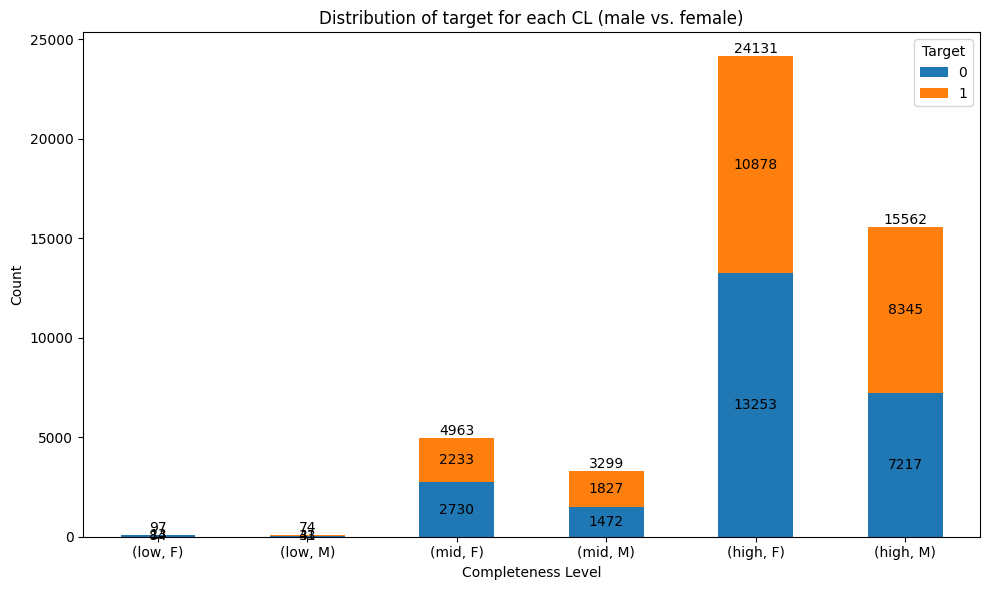

In [ ]:



# Assuming 'merged_df' is your DataFrame
# Group data for plotting
grouped = merged_df.groupby(['completeness_level_x', 'last_sex_738L', 'target']).size().unstack(fill_value=0)

# Create order for completeness levels
completeness_order = ['low', 'mid', 'high']

# Create the plot
ax = grouped.loc[completeness_order].plot(kind='bar', stacked=True, figsize=(10, 6))

# Add count labels above the bars
for i, (completeness_level, counts) in enumerate(grouped.loc[completeness_order].iterrows()):
    total = counts.sum()
    ax.text(i, total + 1, str(total), ha='center', va='bottom')  # Positioned above the bar

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')


# Customize plot
plt.xlabel('Completeness Level')
plt.ylabel('Count')
plt.title('Distribution of target for each CL (male vs. female)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Target')
plt.tight_layout()
plt.show()


In [ ]:
grouped


target                                  0      1
completeness_level_x last_sex_738L              
high                 F              13253  10878
                     M               7217   8345
low                  F                 84     13
                     M                 41     33
mid                  F               2730   2233
                     M               1472   1827

In [ ]:
#'disbursedcredamount_1113A': disbursed credit amt after consolidation
#'credamount_770A': loan amount or credit card limit
#'max_credamount_590A': loan amount or card limit of previous applications
#'totaldebt_9A': total amount of debt of the applicant

def create_spiderplot_new(df, categories):
    categories = categories
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    groups = df['completeness_level_x'].unique()

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for group in groups:
        values = df[df['completeness_level_x'] == group][categories].mean().values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=group)
        ax.fill(angles, values, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), categories, fontsize=10) # Increased fontsize for better readability
    ax.set_title('Credit Profile for each Completeness Level', fontsize=14, y=1.1) # Adjusted title position and fontsize
    ax.grid(True)

    #adjust legend location and remove overlapping
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3) # Adjusted legend position and added ncol

    plt.tight_layout() # Ensures everything fits within the figure
    plt.show()


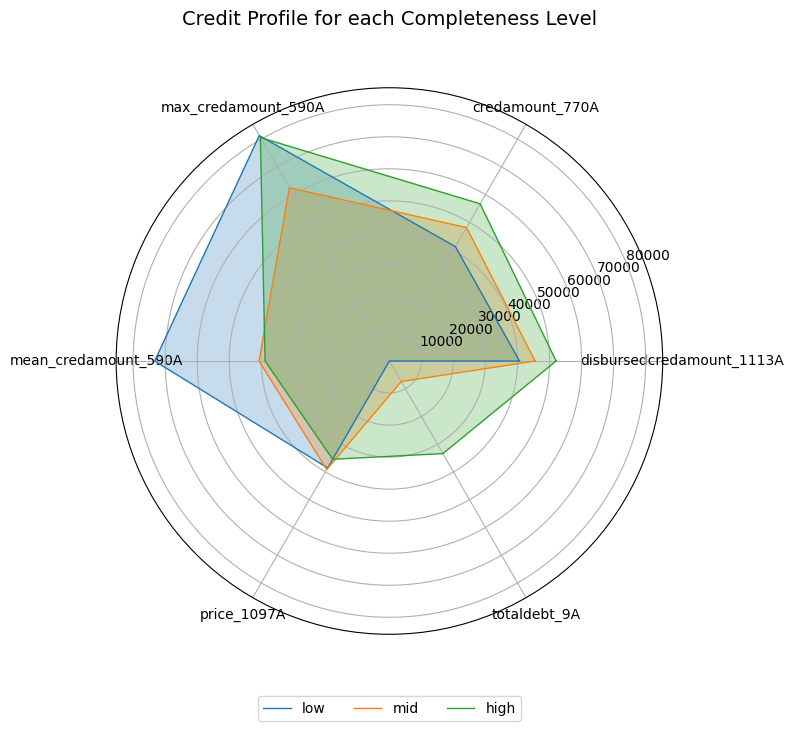

In [ ]:
create_spiderplot_new(merged_df,['disbursedcredamount_1113A','credamount_770A', 'max_credamount_590A', 'mean_credamount_590A', 'price_1097A', 'totaldebt_9A'])

In [ ]:
[col for col in merged_df.columns if 'debt' in col]


['max_debtoutstand_525A',
 'max_debtoverdue_47A',
 'currdebt_22A',
 'currdebtcredtyperange_828A',
 'maxdebt4_972A',
 'totaldebt_9A',
 'max_currdebt_94A',
 'mean_currdebt_94A',
 'max_outstandingdebt_522A',
 'mean_outstandingdebt_522A',
 'last_currdebt_94A',
 'last_outstandingdebt_522A',
 'mean_totaloutstanddebtvalue_39A',
 'mean_totaldebtoverduevalue_718A',
 'mean_totaloutstanddebtvalue_668A']

In [ ]:
merged_df['completeness_level_x'].value_counts()

,count
completeness_level_x,
high,58027
mid,33699
low,4264


# Cost Analysis

In [ ]:
threshold_df.columns
threshold_df.head()

Index(['model', 'metric', 'STO1_high_threshold', 'STO1_high_score',
       'STO1_mid_threshold', 'STO1_mid_score', 'STO1_low_threshold',
       'STO1_low_score', 'STO2_high_threshold', 'STO2_high_score',
       'STO2_mid_threshold', 'STO2_mid_score', 'STO2_low_threshold',
       'STO2_low_score', 'STO3_high_threshold', 'STO3_high_score',
       'STO3_mid_threshold', 'STO3_mid_score', 'STO3_low_threshold',
       'STO3_low_score'],
      dtype='object')

,model,metric,STO1_high_threshold,STO1_high_score,STO1_mid_threshold,STO1_mid_score,STO1_low_threshold,STO1_low_score,STO2_high_threshold,STO2_high_score,STO2_mid_threshold,STO2_mid_score,STO2_low_threshold,STO2_low_score,STO3_high_threshold,STO3_high_score,STO3_mid_threshold,STO3_mid_score,STO3_low_threshold,STO3_low_score
0,DT,Accuracy,0.05,0.500644,0.06,0.500598,0.70,0.500621,0.50,0.688940,0.50,0.679062,0.52,0.611629,0.49,0.689122,0.51,0.679250,0.52,0.611629
1,DT,Balanced Accuracy,0.99,0.500120,0.96,0.500119,0.75,0.500119,0.50,0.688924,0.50,0.679084,0.52,0.611455,0.49,0.689086,0.51,0.679251,0.52,0.611455
2,DT,F1 Score,0.99,0.000665,0.97,0.000764,0.75,0.000667,0.50,0.693400,0.14,0.686455,0.37,0.673924,0.34,0.721782,0.36,0.708892,0.37,0.673924
3,DT,Precision,0.06,0.501069,0.08,0.501460,0.01,0.501433,0.55,0.705938,0.57,0.705368,0.74,0.705882,0.89,0.861965,0.88,0.846088,0.75,0.777778
4,DT,Recall,0.99,0.000333,0.97,0.000382,0.75,0.000333,0.06,0.999369,0.07,0.999242,0.18,0.999381,0.01,0.999616,0.01,0.999779,0.17,0.999857


In [ ]:
models = threshold_df['model'].unique()
metrics = threshold_df['metric'].unique()

In [ ]:
# prompt: for model in models, calculate base_pred_class using threshold = 0.5 on full_results_df[<model>_y_pred_proba] output in new pred_class_df

pred_class_df = pd.DataFrame()
for model in models:
  pred_class_df[f'{model}_pred_class'] = (full_results_df[f'{model}_y_pred_proba'] > 0.5).astype(int)


In [ ]:
pred_class_df.head()
pred_class_df.info()

,DT_pred_class,RF_pred_class,LGBM_pred_class,XGB_pred_class
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,0,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DT_pred_class    95990 non-null  int64
 1   RF_pred_class    95990 non-null  int64
 2   LGBM_pred_class  95990 non-null  int64
 3   XGB_pred_class   95990 non-null  int64
dtypes: int64(4)
memory usage: 2.9 MB


In [ ]:
# prompt: for model in models and metric in metrics, calculate STO1_pred_class using threshold_df[STO1_low_threshold] for full_results_df[completeness_level] = low, STO1_mid_threshold for full_results_df[completeness_level] = mid, STO1_high_threshold for full_results_df[completeness_level] = high on full_results_df[<model>_y_pred_proba]. Similarly for STO2_pred_class and STO3_pred_class. output in new STO_pred_class_df

STO_pred_class_df = pd.DataFrame()

for model in models:
  for metric in metrics:
    STO_pred_class_df[f'{model}_{metric}_STO1_pred_class'] = np.nan
    STO_pred_class_df[f'{model}_{metric}_STO2_pred_class'] = np.nan
    STO_pred_class_df[f'{model}_{metric}_STO3_pred_class'] = np.nan

    for idx, row in full_results_df.iterrows():
      completeness_level = row['completeness_level']
      if completeness_level == 'low':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO1_low_threshold'].values[0]
      elif completeness_level == 'mid':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO1_mid_threshold'].values[0]
      else:
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO1_high_threshold'].values[0]

      STO_pred_class_df.loc[idx, f'{model}_{metric}_STO1_pred_class'] = (row[f'{model}_y_pred_proba'] > threshold).astype(int)


      if completeness_level == 'low':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO2_low_threshold'].values[0]
      elif completeness_level == 'mid':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO2_mid_threshold'].values[0]
      else:
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO2_high_threshold'].values[0]

      STO_pred_class_df.loc[idx, f'{model}_{metric}_STO2_pred_class'] = (row[f'{model}_y_pred_proba'] > threshold).astype(int)


      if completeness_level == 'low':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO3_low_threshold'].values[0]
      elif completeness_level == 'mid':
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO3_mid_threshold'].values[0]
      else:
        threshold = threshold_df[(threshold_df['model'] == model) & (threshold_df['metric'] == metric)]['STO3_high_threshold'].values[0]

      STO_pred_class_df.loc[idx, f'{model}_{metric}_STO3_pred_class'] = (row[f'{model}_y_pred_proba'] > threshold).astype(int)



In [ ]:
STO_pred_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95990 entries, 0 to 95989
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DT_Accuracy_STO1_pred_class             95990 non-null  float64
 1   DT_Accuracy_STO2_pred_class             95990 non-null  float64
 2   DT_Accuracy_STO3_pred_class             95990 non-null  float64
 3   DT_Balanced Accuracy_STO1_pred_class    95990 non-null  float64
 4   DT_Balanced Accuracy_STO2_pred_class    95990 non-null  float64
 5   DT_Balanced Accuracy_STO3_pred_class    95990 non-null  float64
 6   DT_F1 Score_STO1_pred_class             95990 non-null  float64
 7   DT_F1 Score_STO2_pred_class             95990 non-null  float64
 8   DT_F1 Score_STO3_pred_class             95990 non-null  float64
 9   DT_Precision_STO1_pred_class            95990 non-null  float64
 10  DT_Precision_STO2_pred_class            95990 non-null  float64

In [ ]:
from collections import Counter

def count_predictions(df, pred_col, target_col):
  """
  Counts the number of 0s and 1s in the predicted class compared to the target.

  Args:
      df: DataFrame containing the predicted class and target columns.
      pred_col: Name of the predicted class column.
      target_col: Name of the target column.

  Returns:
      A dictionary containing the counts of TP, TN, FP, FN.
  """
  tp = df[(df[pred_col] == 1) & (df[target_col] == 1)].shape[0]
  tn = df[(df[pred_col] == 0) & (df[target_col] == 0)].shape[0]
  fp = df[(df[pred_col] == 1) & (df[target_col] == 0)].shape[0]
  fn = df[(df[pred_col] == 0) & (df[target_col] == 1)].shape[0]
  return {"TP": tp, "TN": tn, "FP": fp, "FN": fn}


In [ ]:
# prompt: add full_results_df['y_test'] to STO_pred_class_df as 'target'

STO_pred_class_df['target'] = full_results_df['y_test']


In [ ]:
STO_pred_class_df['cost'] = full_balanced_df['price_1097A']

In [ ]:
STO_pred_class_df.columns

Index(['DT_Accuracy_STO1_pred_class', 'DT_Accuracy_STO2_pred_class',
       'DT_Accuracy_STO3_pred_class', 'DT_Balanced Accuracy_STO1_pred_class',
       'DT_Balanced Accuracy_STO2_pred_class',
       'DT_Balanced Accuracy_STO3_pred_class', 'DT_F1 Score_STO1_pred_class',
       'DT_F1 Score_STO2_pred_class', 'DT_F1 Score_STO3_pred_class',
       'DT_Precision_STO1_pred_class', 'DT_Precision_STO2_pred_class',
       'DT_Precision_STO3_pred_class', 'DT_Recall_STO1_pred_class',
       'DT_Recall_STO2_pred_class', 'DT_Recall_STO3_pred_class',
       'RF_Accuracy_STO1_pred_class', 'RF_Accuracy_STO2_pred_class',
       'RF_Accuracy_STO3_pred_class', 'RF_Balanced Accuracy_STO1_pred_class',
       'RF_Balanced Accuracy_STO2_pred_class',
       'RF_Balanced Accuracy_STO3_pred_class', 'RF_F1 Score_STO1_pred_class',
       'RF_F1 Score_STO2_pred_class', 'RF_F1 Score_STO3_pred_class',
       'RF_Precision_STO1_pred_class', 'RF_Precision_STO2_pred_class',
       'RF_Precision_STO3_pred_class', 'RF_

In [ ]:
# prompt: merge  STO_pred_class_df to pred_class_df

full_pred_class_df = pd.merge(pred_class_df, STO_pred_class_df, left_index=True, right_index=True)
full_pred_class_df.info()
full_pred_class_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95990 entries, 0 to 95989
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DT_pred_class                           95990 non-null  int64  
 1   RF_pred_class                           95990 non-null  int64  
 2   LGBM_pred_class                         95990 non-null  int64  
 3   XGB_pred_class                          95990 non-null  int64  
 4   DT_Accuracy_STO1_pred_class             95990 non-null  float64
 5   DT_Accuracy_STO2_pred_class             95990 non-null  float64
 6   DT_Accuracy_STO3_pred_class             95990 non-null  float64
 7   DT_Balanced Accuracy_STO1_pred_class    95990 non-null  float64
 8   DT_Balanced Accuracy_STO2_pred_class    95990 non-null  float64
 9   DT_Balanced Accuracy_STO3_pred_class    95990 non-null  float64
 10  DT_F1 Score_STO1_pred_class             95990 non-null  fl

,DT_pred_class,RF_pred_class,LGBM_pred_class,XGB_pred_class,DT_Accuracy_STO1_pred_class,DT_Accuracy_STO2_pred_class,DT_Accuracy_STO3_pred_class,DT_Balanced Accuracy_STO1_pred_class,DT_Balanced Accuracy_STO2_pred_class,DT_Balanced Accuracy_STO3_pred_class,...,XGB_F1 Score_STO2_pred_class,XGB_F1 Score_STO3_pred_class,XGB_Precision_STO1_pred_class,XGB_Precision_STO2_pred_class,XGB_Precision_STO3_pred_class,XGB_Recall_STO1_pred_class,XGB_Recall_STO2_pred_class,XGB_Recall_STO3_pred_class,target,cost
0,1,1,1,1,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,31937.8000
1,1,1,1,1,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,17974.0000
2,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,84576.0000
3,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,7749.8003
4,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1,23372.0000


In [ ]:
counts = count_predictions(STO_pred_class_df, 'XGB_F1 Score_STO3_pred_class', 'target')

print("Counts for STO1_pred_class compared to target:")
counts

Counts for STO1_pred_class compared to target:


{'TP': 42302, 'TN': 29357, 'FP': 18829, 'FN': 5502}

In [ ]:
# prompt: count_predictions for STO1, STO2 and STO3  and show in a dataframe

# Create a dictionary to store the counts for each STO
sto_counts = {}

for sto_col in [col for col in full_pred_class_df.columns if col not in ['target', 'cost']]:
  sto_counts[sto_col] = count_predictions(full_pred_class_df, sto_col, 'target')

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(sto_counts, orient='index')

counts_df


,TP,TN,FP,FN
DT_pred_class,34330,31777,16409,13474
RF_pred_class,37514,34105,14081,10290
LGBM_pred_class,38210,35602,12584,9594
XGB_pred_class,37288,35466,12720,10516
DT_Accuracy_STO1_pred_class,45712,2170,46016,2092
...,...,...,...,...
XGB_Precision_STO2_pred_class,28300,41394,6792,19504
XGB_Precision_STO3_pred_class,317,48165,21,47487
XGB_Recall_STO1_pred_class,47711,4373,43813,93
XGB_Recall_STO2_pred_class,47711,4373,43813,93


In [ ]:
full_pred_class_df.columns

Index(['DT_pred_class', 'RF_pred_class', 'LGBM_pred_class', 'XGB_pred_class',
       'DT_Accuracy_STO1_pred_class', 'DT_Accuracy_STO2_pred_class',
       'DT_Accuracy_STO3_pred_class', 'DT_Balanced Accuracy_STO1_pred_class',
       'DT_Balanced Accuracy_STO2_pred_class',
       'DT_Balanced Accuracy_STO3_pred_class', 'DT_F1 Score_STO1_pred_class',
       'DT_F1 Score_STO2_pred_class', 'DT_F1 Score_STO3_pred_class',
       'DT_Precision_STO1_pred_class', 'DT_Precision_STO2_pred_class',
       'DT_Precision_STO3_pred_class', 'DT_Recall_STO1_pred_class',
       'DT_Recall_STO2_pred_class', 'DT_Recall_STO3_pred_class',
       'RF_Accuracy_STO1_pred_class', 'RF_Accuracy_STO2_pred_class',
       'RF_Accuracy_STO3_pred_class', 'RF_Balanced Accuracy_STO1_pred_class',
       'RF_Balanced Accuracy_STO2_pred_class',
       'RF_Balanced Accuracy_STO3_pred_class', 'RF_F1 Score_STO1_pred_class',
       'RF_F1 Score_STO2_pred_class', 'RF_F1 Score_STO3_pred_class',
       'RF_Precision_STO1_pred_class

In [ ]:
# prompt: calculate cost of FP and FN - sum of 'price_1097A' for FP and sum of price_1097A for FN

def calculate_cost(df, pred_col, target_col, price_col):
  """
  Calculates the cost of false positives (FP) and false negatives (FN).

  Args:
      df: DataFrame containing the predicted class, target, and price columns.
      pred_col: Name of the predicted class column.
      target_col: Name of the target column.
      price_col: Name of the price column.

  Returns:
      A tuple containing the cost of FP and FN.
  """
  fp_cost = df[(df[pred_col] == 1) & (df[target_col] == 0)][price_col].sum()
  fn_cost = df[(df[pred_col] == 0) & (df[target_col] == 1)][price_col].sum()
  tp_cost = df[(df[pred_col] == 1) & (df[target_col] == 1)][price_col].sum()
  tn_cost = df[(df[pred_col] == 0) & (df[target_col] == 0)][price_col].sum()
  return fp_cost, fn_cost, tp_cost, tn_cost


In [ ]:
fp_cost_base, fn_cost_base, tp_cost_base, tn_cost_base = calculate_cost(full_pred_class_df, 'XGB_F1 Score_STO3_pred_class', 'target', 'cost')
print(f"Base TP cost: {tp_cost_base}, TN cost: {tn_cost_base}, FP cost: {fp_cost_base}, FN cost: {fn_cost_base}")

Base TP cost: 1340521976.2616, TN cost: 921246130.6479, FP cost: 587580439.1309999, FN cost: 175004631.5343


In [ ]:
# prompt: combine count_prediction and calculate_cost for 'BASE_pred_class','STO1_pred_class', 'STO2_pred_class', 'STO3_pred_class' and output result in dataframe with columns TP, TP_cost, TN,TN_cost, FP, FP_cost,FN,FN_cost

def calculate_and_combine_metrics(cost_df):
  """
  Calculates and combines TP, TN, FP, FN counts and their associated costs for specified columns.

  Args:
      cost_df: DataFrame containing prediction columns and target.

  Returns:
      DataFrame with columns TP, TP_cost, TN, TN_cost, FP, FP_cost, FN, FN_cost.
  """

  results_df = pd.DataFrame()
  for sto_col in [col for col in full_pred_class_df.columns if col not in ['target', 'cost']]:
    counts = count_predictions(cost_df, sto_col, 'target')
    fp_cost, fn_cost, tp_cost, tn_cost = calculate_cost(cost_df, sto_col, 'target', 'cost')
    results_df.loc[sto_col, 'TP'] = counts['TP']
    results_df.loc[sto_col, 'TP_cost'] = tp_cost
    results_df.loc[sto_col, 'TN'] = counts['TN']
    results_df.loc[sto_col, 'TN_cost'] = tn_cost
    results_df.loc[sto_col, 'FP'] = counts['FP']
    results_df.loc[sto_col, 'FP_cost'] = fp_cost
    results_df.loc[sto_col, 'FN'] = counts['FN']
    results_df.loc[sto_col, 'FN_cost'] = fn_cost
  return results_df


In [ ]:
combined_metrics_df = calculate_and_combine_metrics(full_pred_class_df)
combined_metrics_df

,TP,TP_cost,TN,TN_cost,FP,FP_cost,FN,FN_cost
DT_pred_class,34330.0,1.085815e+09,31777.0,1.002653e+09,16409.0,5.061735e+08,13474.0,4.297113e+08
RF_pred_class,37514.0,1.182764e+09,34105.0,1.069598e+09,14081.0,4.392284e+08,10290.0,3.327626e+08
LGBM_pred_class,38210.0,1.208679e+09,35602.0,1.113064e+09,12584.0,3.957629e+08,9594.0,3.068472e+08
XGB_pred_class,37288.0,1.180665e+09,35466.0,1.115139e+09,12720.0,3.936875e+08,10516.0,3.348616e+08
DT_Accuracy_STO1_pred_class,45712.0,1.446973e+09,2170.0,6.791266e+07,46016.0,1.440914e+09,2092.0,6.855340e+07
...,...,...,...,...,...,...,...,...
XGB_Precision_STO2_pred_class,28300.0,8.989176e+08,41394.0,1.298953e+09,6792.0,2.098731e+08,19504.0,6.166090e+08
XGB_Precision_STO3_pred_class,317.0,1.014901e+07,48165.0,1.508512e+09,21.0,3.142500e+05,47487.0,1.505378e+09
XGB_Recall_STO1_pred_class,47711.0,1.512304e+09,4373.0,1.350840e+08,43813.0,1.373743e+09,93.0,3.222877e+06
XGB_Recall_STO2_pred_class,47711.0,1.512304e+09,4373.0,1.350840e+08,43813.0,1.373743e+09,93.0,3.222877e+06


In [ ]:
# prompt: covert index to column combined_metrics_df

combined_metrics_df = combined_metrics_df.reset_index().rename(columns={'index': 'pred_class'})


In [ ]:
combined_metrics_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/cost_analysis.csv', index=False)

In [ ]:
# prompt: generate summary statistics for records with *STO1* from combined_metrics_df

# Filter the DataFrame for records with 'STO1' in the 'pred_class' column
sto_df = combined_metrics_df[combined_metrics_df['pred_class'].str.contains('STO3')]

# Generate summary statistics for the filtered DataFrame
sto_summary = sto_df.describe()

# Print the summary statistics
sto_summary


,TP,TP_cost,TN,TN_cost,FP,FP_cost,FN,FN_cost
count,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01
mean,32993.850000,1.044618e+09,28818.950000,9.037636e+08,19367.050000,6.050630e+08,14810.150000,4.709087e+08
std,17118.179906,5.421801e+08,16121.294291,5.050154e+08,16121.294291,5.050154e+08,17118.179906,5.421801e+08
min,135.000000,4.659069e+06,6.000000,2.789346e+05,3.000000,3.139600e+04,0.000000,0.000000e+00
25%,34621.000000,1.095637e+09,26782.250000,8.384494e+08,12891.000000,4.047975e+08,5528.250000,1.773440e+08
50%,38557.000000,1.220315e+09,32680.000000,1.027237e+09,15506.000000,4.815892e+08,9247.000000,2.952112e+08
75%,42275.750000,1.338183e+09,35295.000000,1.104029e+09,21403.750000,6.703772e+08,13183.000000,4.198892e+08
max,47804.000000,1.515527e+09,48183.000000,1.508795e+09,48180.000000,1.508548e+09,47669.000000,1.510868e+09


## Cost Analysis Plots

In [ ]:
cost_analysis_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/cost_analysis.csv')

In [ ]:
# Calculate LGD, ActualRevenue, RevenueLossRatio, and OpportunityCostRatio
cost_analysis_df['LGD'] = cost_analysis_df['FN_cost'] * 0.6
cost_analysis_df['ActualProfit'] = cost_analysis_df['TN_cost'] - cost_analysis_df['LGD']
cost_analysis_df['RevenueLossRatio'] = cost_analysis_df['LGD'] / cost_analysis_df['TN_cost']
cost_analysis_df['OpportunityCostRatio'] = cost_analysis_df['FP_cost'] / cost_analysis_df['TP_cost']


In [ ]:
cost_analysis_df.head()

,pred_class,TP,TP_cost,TN,TN_cost,FP,FP_cost,FN,FN_cost,LGD,ActualProfit,RevenueLossRatio,OpportunityCostRatio
0,DT_pred_class,34330.0,1.085815e+09,31777.0,1.002653e+09,16409.0,5.061735e+08,13474.0,4.297113e+08,2.578268e+08,7.448263e+08,0.257145,0.466169
1,RF_pred_class,37514.0,1.182764e+09,34105.0,1.069598e+09,14081.0,4.392284e+08,10290.0,3.327626e+08,1.996576e+08,8.699406e+08,0.186666,0.371358
2,LGBM_pred_class,38210.0,1.208679e+09,35602.0,1.113064e+09,12584.0,3.957629e+08,9594.0,3.068472e+08,1.841083e+08,9.289554e+08,0.165407,0.327434
3,XGB_pred_class,37288.0,1.180665e+09,35466.0,1.115139e+09,12720.0,3.936875e+08,10516.0,3.348616e+08,2.009169e+08,9.142221e+08,0.180172,0.333446
4,DT_Accuracy_STO1_pred_class,45712.0,1.446973e+09,2170.0,6.791266e+07,46016.0,1.440914e+09,2092.0,6.855340e+07,4.113204e+07,2.678063e+07,0.605661,0.995812


In [ ]:
# Assuming 'cost_analysis_df' is your DataFrame
cost_analysis_df['model'] = cost_analysis_df['pred_class'].str.split('_').str[0]
cost_analysis_df['metric'] = cost_analysis_df['pred_class'].str.split('_').str[1]
cost_analysis_df['STO'] = cost_analysis_df['pred_class'].str.split('_').str[2]


In [ ]:
# prompt: change to 'Base' for metric = 'pred', change to 'Base' for STO = 'class' in cost_analysis_df

cost_analysis_df.loc[cost_analysis_df['metric'] == 'pred', 'metric'] = 'Base'
cost_analysis_df.loc[cost_analysis_df['STO'] == 'class', 'STO'] = 'Base'


In [ ]:
# prompt: reorder columns model,metric,STO to column 0, 1,  2 in cost_analysis_df

new_column_order = ['model', 'metric', 'STO', 'TP', 'TP_cost', 'TN', 'TN_cost', 'FP', 'FP_cost', 'FN', 'FN_cost', 'LGD', 'ActualProfit', 'RevenueLossRatio', 'OpportunityCostRatio']
cost_analysis_df = cost_analysis_df[new_column_order]


In [ ]:
cost_analysis_df.head()

,model,metric,STO,TP,TP_cost,TN,TN_cost,FP,FP_cost,FN,FN_cost,LGD,ActualProfit,RevenueLossRatio,OpportunityCostRatio
0,DT,Base,Base,34330.0,1.085815e+09,31777.0,1.002653e+09,16409.0,5.061735e+08,13474.0,4.297113e+08,2.578268e+08,7.448263e+08,0.257145,0.466169
1,RF,Base,Base,37514.0,1.182764e+09,34105.0,1.069598e+09,14081.0,4.392284e+08,10290.0,3.327626e+08,1.996576e+08,8.699406e+08,0.186666,0.371358
2,LGBM,Base,Base,38210.0,1.208679e+09,35602.0,1.113064e+09,12584.0,3.957629e+08,9594.0,3.068472e+08,1.841083e+08,9.289554e+08,0.165407,0.327434
3,XGB,Base,Base,37288.0,1.180665e+09,35466.0,1.115139e+09,12720.0,3.936875e+08,10516.0,3.348616e+08,2.009169e+08,9.142221e+08,0.180172,0.333446
4,DT,Accuracy,STO1,45712.0,1.446973e+09,2170.0,6.791266e+07,46016.0,1.440914e+09,2092.0,6.855340e+07,4.113204e+07,2.678063e+07,0.605661,0.995812


In [ ]:
cost_analysis_df.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/cost_analysis_new.csv', index=False)

In [ ]:
cost_analysis_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/cost_analysis_new.csv')

<Axes: xlabel='RevenueLossRatio', ylabel='ActualProfit'>

Text(0.5, 1.0, 'LR Ratio vs Profit')

Text(0.5, 0, 'LR Ratio')

Text(0, 0.5, 'Profit')

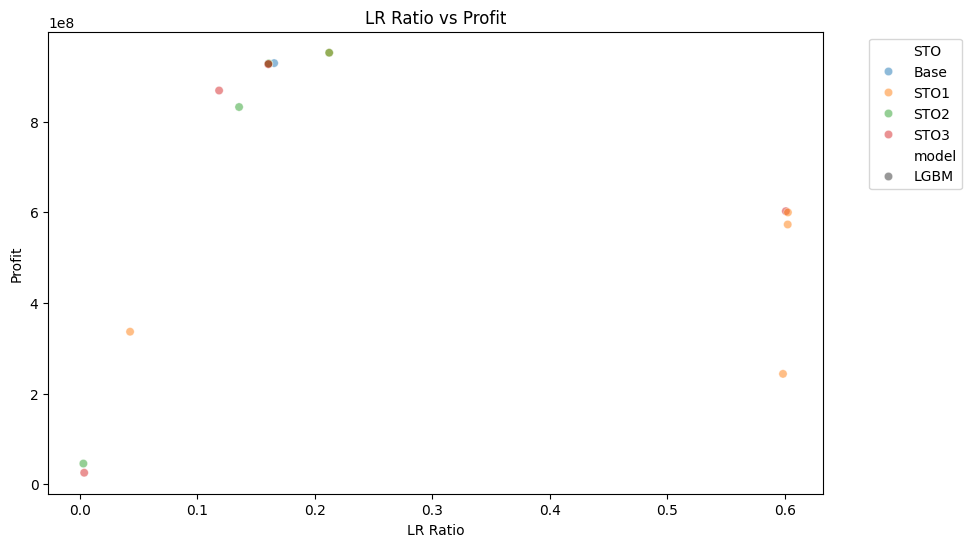

In [ ]:
# prompt: scatterplot RevenueLossRatio with ActualProfit from cost_analysis_df, dots shape by STO and colour by model

# Assuming 'cost_analysis_df' is your DataFrame

cost_analysis_df_filtered = cost_analysis_df[(cost_analysis_df['model'] =='LGBM')]
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='RevenueLossRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df_filtered, marker='o', alpha=0.5)
plt.title('LR Ratio vs Profit')
plt.xlabel('LR Ratio')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

#fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LRvProfit.pdf')
plt.show()


In [ ]:
cost_analysis_df_filtered

,model,metric,STO,TP,TP_cost,TN,TN_cost,FP,FP_cost,FN,FN_cost,LGD,ActualProfit,RevenueLossRatio,OpportunityCostRatio
2,LGBM,Base,Base,38210.0,1.208679e+09,35602.0,1.113064e+09,12584.0,3.957629e+08,9594.0,3.068472e+08,1.841083e+08,9.289554e+08,0.165407,0.426030
34,LGBM,Accuracy,STO1,28955.0,9.109708e+08,19127.0,6.062056e+08,29059.0,9.026210e+08,18849.0,6.045558e+08,3.627335e+08,2.434721e+08,0.598367,3.707287
35,LGBM,Accuracy,STO2,38494.0,1.219413e+09,35365.0,1.105496e+09,12821.0,4.033306e+08,9310.0,2.961132e+08,1.776679e+08,9.278280e+08,0.160713,0.434704
36,LGBM,Accuracy,STO3,38548.0,1.220201e+09,35295.0,1.104029e+09,12891.0,4.047975e+08,9256.0,2.953253e+08,1.771952e+08,9.268339e+08,0.160499,0.436753
37,LGBM,Balanced Accuracy,STO1,2093.0,6.877627e+07,46015.0,1.441041e+09,2171.0,6.778522e+07,45711.0,1.446750e+09,8.680502e+08,5.729911e+08,0.602377,0.118301
38,LGBM,Balanced Accuracy,STO2,38494.0,1.219413e+09,35365.0,1.105496e+09,12821.0,4.033306e+08,9310.0,2.961132e+08,1.776679e+08,9.278280e+08,0.160713,0.434704
39,LGBM,Balanced Accuracy,STO3,38548.0,1.220201e+09,35295.0,1.104029e+09,12891.0,4.047975e+08,9256.0,2.953253e+08,1.771952e+08,9.268339e+08,0.160499,0.436753
40,LGBM,F1 Score,STO1,47074.0,1.490451e+09,11271.0,3.514950e+08,36915.0,1.157332e+09,730.0,2.507515e+07,1.504509e+07,3.364500e+08,0.042803,3.439833
41,LGBM,F1 Score,STO2,41058.0,1.298039e+09,30943.0,9.626063e+08,17243.0,5.462202e+08,6746.0,2.174877e+08,1.304926e+08,8.321137e+08,0.135562,0.656425
42,LGBM,F1 Score,STO3,41785.0,1.320835e+09,31375.0,9.853445e+08,16811.0,5.234821e+08,6019.0,1.946913e+08,1.168148e+08,8.685297e+08,0.118552,0.602722


In [ ]:
# prompt: show overlapping dots in scatterplot

# Assuming 'cost_analysis_df' is your DataFrame

cost_analysis_df_filtered = cost_analysis_df[(cost_analysis_df['model'] =='LGBM')&(cost_analysis_df['STO'] == 'STO2')]
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='RevenueLossRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df_filtered)
plt.title('LR Ratio vs Profit')
plt.xlabel('LR Ratio')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Add jitter to avoid overlapping points
# sns.scatterplot(x='RevenueLossRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df_filtered, x_jitter=0.05, y_jitter=0.05)


# Alternatively, you can use a different marker or adjust the alpha value to make the points more distinct.
# sns.scatterplot(x='RevenueLossRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df_filtered, marker='o', alpha=0.5)

#fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LRvProfit.pdf')
plt.show()

cost_analysis_df_filtered


<Axes: xlabel='RevenueLossRatio', ylabel='ActualProfit'>

Text(0.5, 1.0, 'LR Ratio vs Profit')

Text(0.5, 0, 'LR Ratio')

Text(0, 0.5, 'Profit')

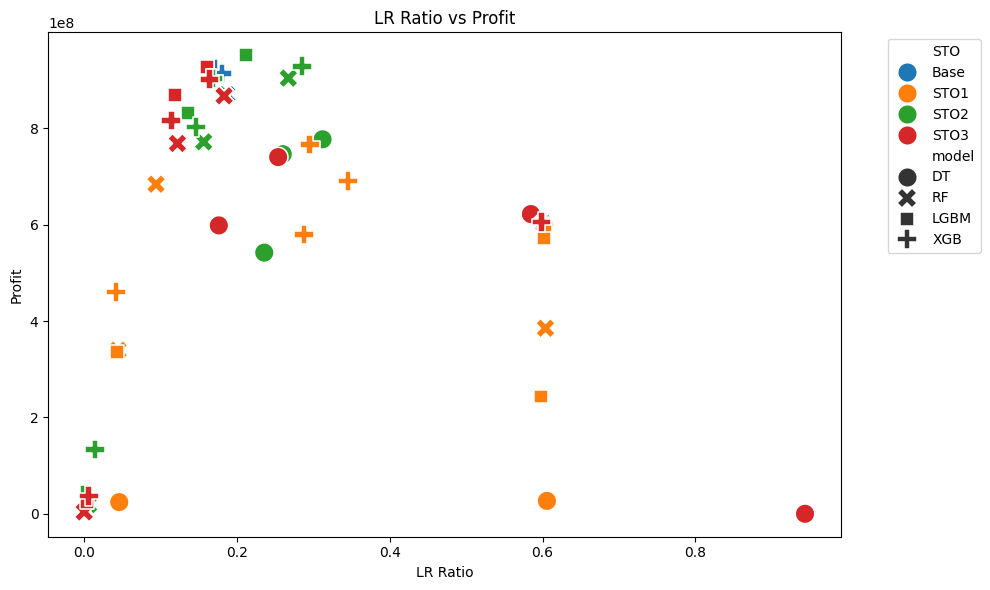

In [ ]:
# prompt: resize the dots to larger in scatterplot

# Assuming 'cost_analysis_df' is your DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='RevenueLossRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df, s=200)  # Increased size of dots using 's'
plt.title('LR Ratio vs Profit')
plt.xlabel('LR Ratio')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()

fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LRvProfit.pdf')
plt.show()


<Axes: xlabel='model', ylabel='ActualProfit'>

Text(0.5, 1.0, 'Distribution of Actual Profit for each model')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Actual Profit')

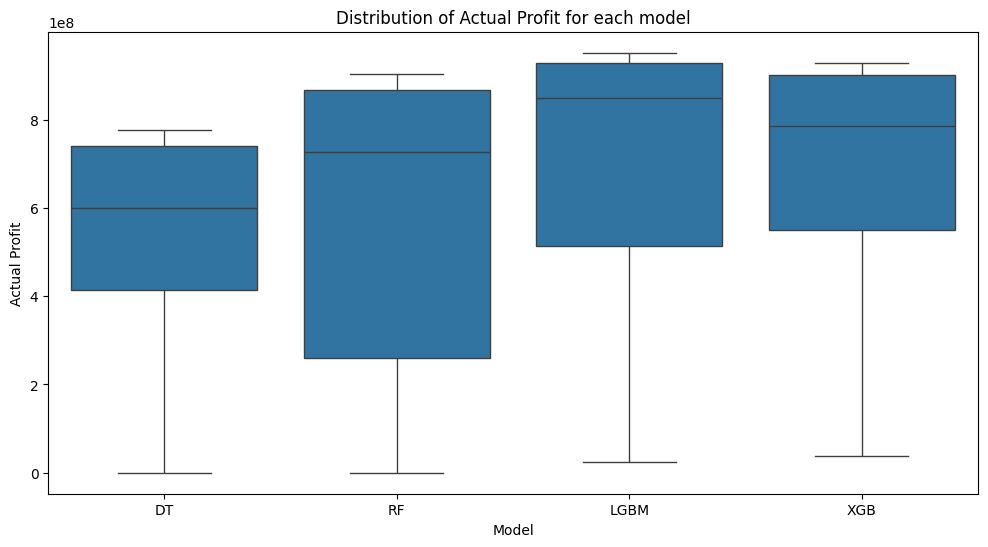

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cost_analysis_df' is your DataFrame
fig, ax = plt.subplots(figsize=(12, 6)) # assign the output of plt.subplots to fig and ax
sns.boxplot(x='model', y='ActualProfit', data=cost_analysis_df, ax=ax) # Pass ax to sns.boxplot
plt.title('Distribution of Actual Profit for each model')
plt.xlabel('Model')
plt.ylabel('Actual Profit')


# Export to PDF
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/ActualProfit.pdf')

plt.show()

<Axes: xlabel='model', ylabel='ActualProfit'>

Text(0.5, 1.0, 'Distribution of Actual Profit for each Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Actual Profit')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

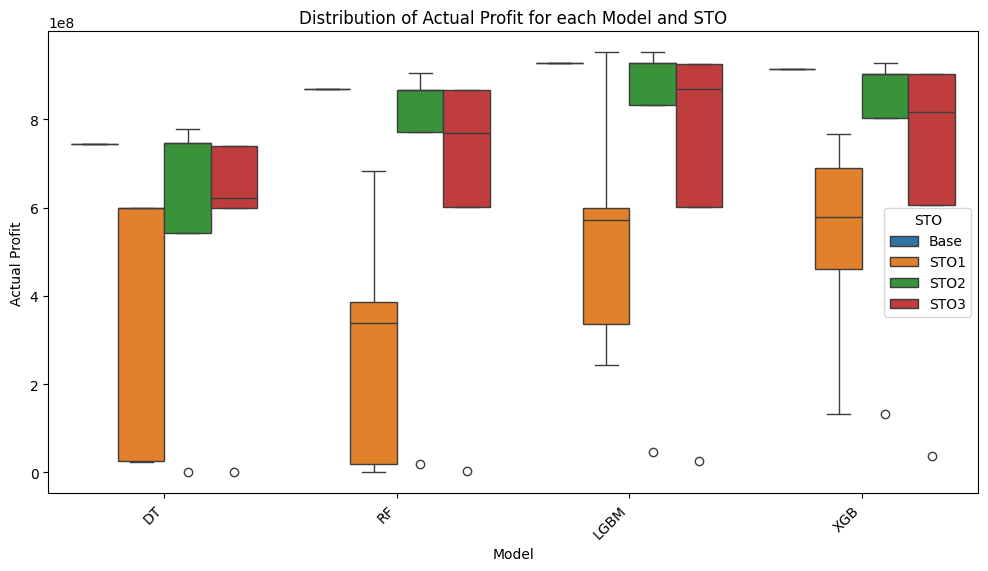

In [ ]:
# prompt: plot the distribution of ActualProfit for each model and STO

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='ActualProfit', hue='STO', data=cost_analysis_df)
plt.title('Distribution of Actual Profit for each Model and STO')
plt.xlabel('Model')
plt.ylabel('Actual Profit')
plt.xticks(rotation=45, ha='right')

fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/ActualProfit_perModel.pdf')
plt.show()


<Axes: xlabel='model', ylabel='TN'>

Text(0.5, 1.0, 'Distribution of Approved Non-defaulted Loans for each Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Count of TN')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

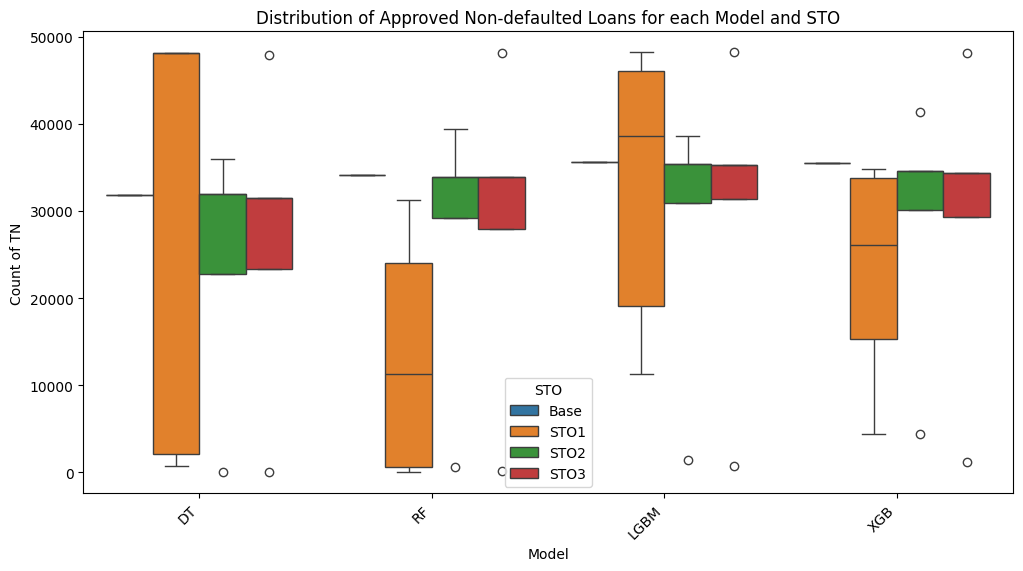

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='TN', hue='STO', data=cost_analysis_df)
plt.title('Distribution of Approved Non-defaulted Loans for each Model and STO')
plt.xlabel('Model')
plt.ylabel('Count of TN')
plt.xticks(rotation=45, ha='right')
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/TN_perModel.pdf')
plt.show()

<Axes: xlabel='model', ylabel='TN_cost'>

Text(0.5, 1.0, 'Distribution of Revenue from TN for each Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Profit')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

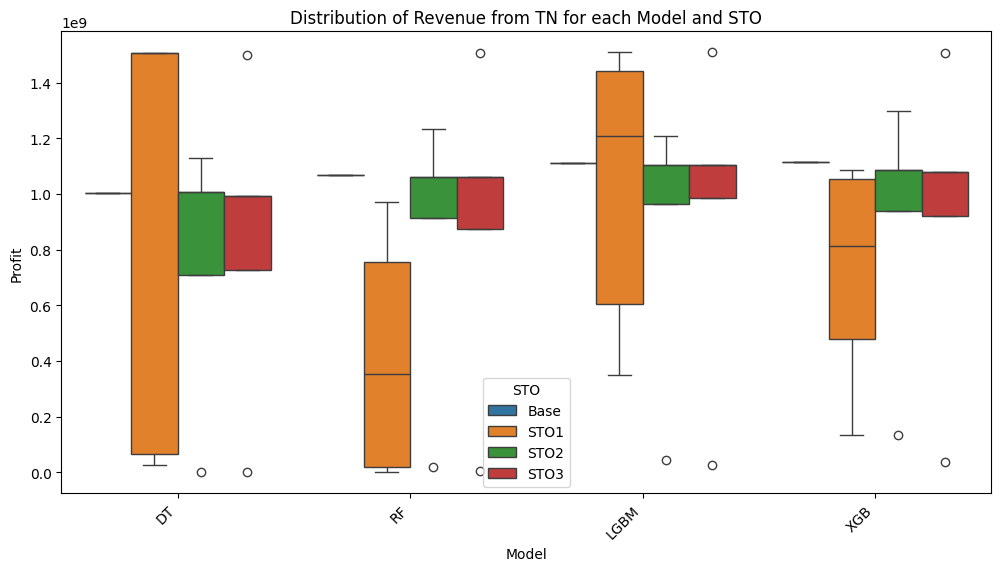

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='TN_cost', hue='STO', data=cost_analysis_df)
plt.title('Distribution of Revenue from TN for each Model and STO')
plt.xlabel('Model')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/TN_Revenue_perModel.pdf')
plt.show()

<Axes: xlabel='model', ylabel='RevenueLossRatio'>

Text(0.5, 1.0, 'Distribution of Loss vs. Revenue Ratio for each Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'RevenueLossRatio')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

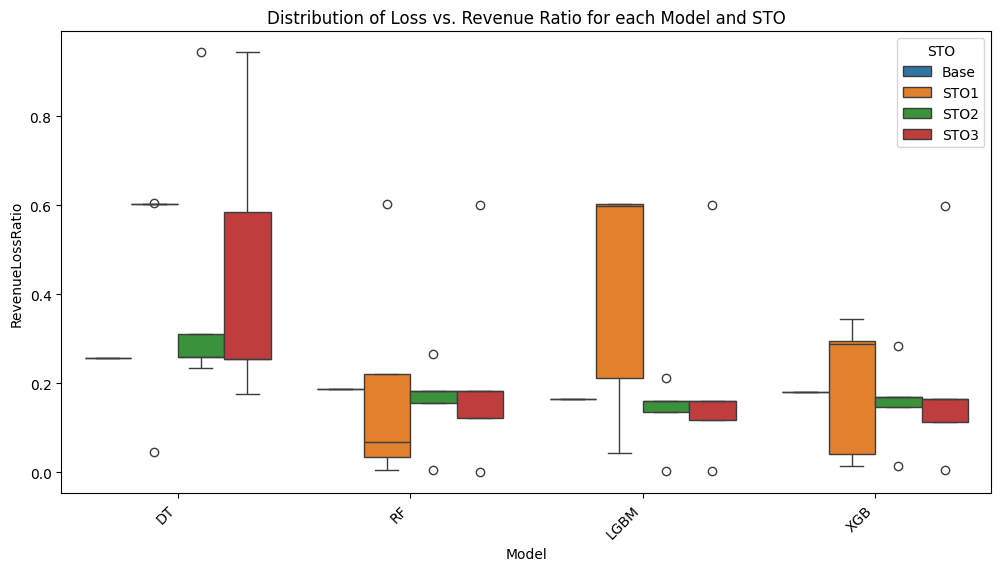

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='RevenueLossRatio', hue='STO', data=cost_analysis_df)
plt.title('Distribution of Loss vs. Revenue Ratio for each Model and STO')
plt.xlabel('Model')
plt.ylabel('RevenueLossRatio')
plt.xticks(rotation=45, ha='right')
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/LossRevenueRatio_perModel.pdf')
plt.show()




In [ ]:
cost_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 64 non-null     object 
 1   metric                64 non-null     object 
 2   STO                   64 non-null     object 
 3   TP                    64 non-null     float64
 4   TP_cost               64 non-null     float64
 5   TN                    64 non-null     float64
 6   TN_cost               64 non-null     float64
 7   FP                    64 non-null     float64
 8   FP_cost               64 non-null     float64
 9   FN                    64 non-null     float64
 10  FN_cost               64 non-null     float64
 11  LGD                   64 non-null     float64
 12  ActualProfit          64 non-null     float64
 13  RevenueLossRatio      63 non-null     float64
 14  OpportunityCostRatio  64 non-null     float64
dtypes: float64(12), object(3)

<Axes: xlabel='model', ylabel='FP_cost'>

Text(0.5, 1.0, 'Distribution of Opportunity Cost per Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Opportunity Cost (FP)')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

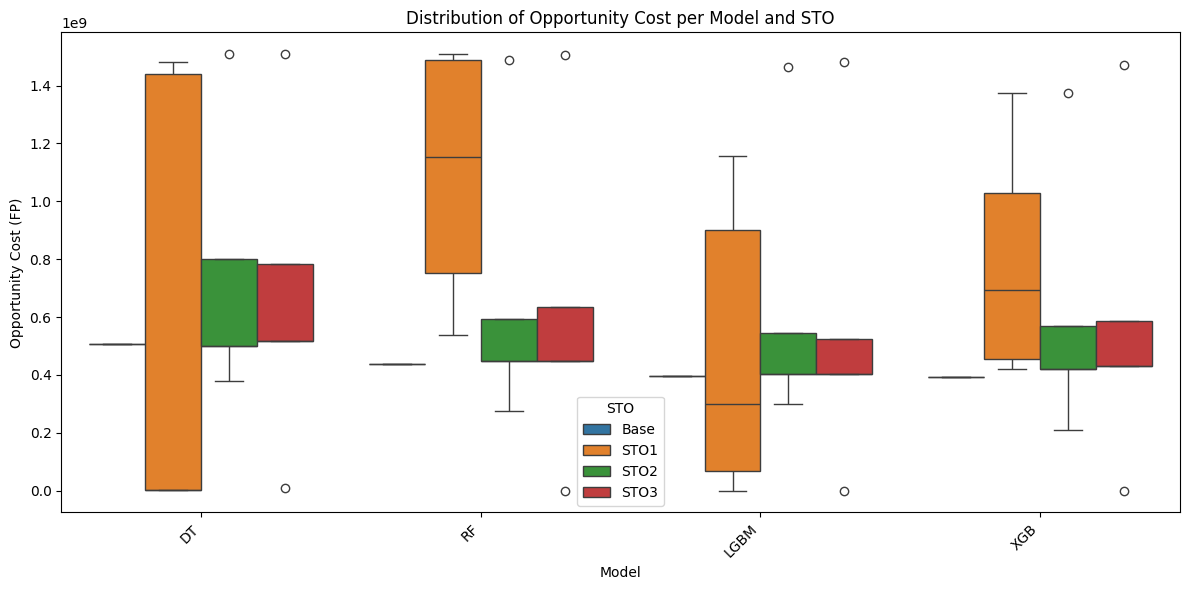

In [ ]:

# Define the order for the STO levels
sto_order = ['Base', 'STO1', 'STO2', 'STO3']

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='FP_cost', hue='STO', data=cost_analysis_df, order=cost_analysis_df['model'].unique(), hue_order=sto_order)
plt.title('Distribution of Opportunity Cost per Model and STO')
plt.xlabel('Model')
plt.ylabel('Opportunity Cost (FP)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/OpportunityCost_perModel.pdf')
plt.show()

In [ ]:
cost_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 64 non-null     object 
 1   metric                64 non-null     object 
 2   STO                   64 non-null     object 
 3   TP                    64 non-null     float64
 4   TP_cost               64 non-null     float64
 5   TN                    64 non-null     float64
 6   TN_cost               64 non-null     float64
 7   FP                    64 non-null     float64
 8   FP_cost               64 non-null     float64
 9   FN                    64 non-null     float64
 10  FN_cost               64 non-null     float64
 11  LGD                   64 non-null     float64
 12  ActualProfit          64 non-null     float64
 13  RevenueLossRatio      63 non-null     float64
 14  OpportunityCostRatio  64 non-null     float64
dtypes: float64(12), object(3)

<Axes: xlabel='OpportunityCostRatio', ylabel='ActualProfit'>

Text(0.5, 1.0, 'Opportunity Cost Ratio vs. Actual Profit')

Text(0.5, 0, 'Opportunity Cost Ratio')

Text(0, 0.5, 'Actual Profit')

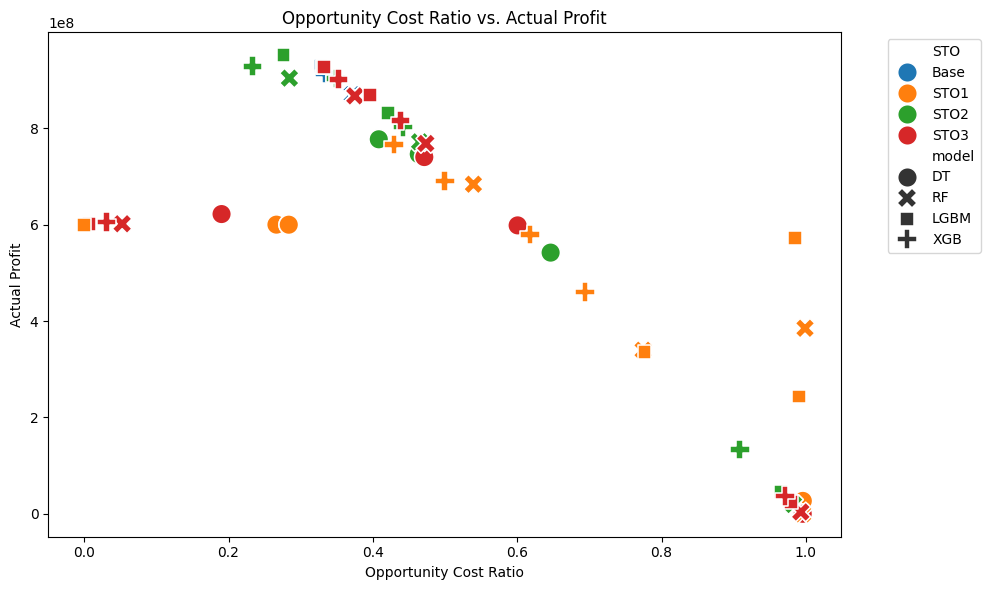

In [ ]:
# prompt: scatterplot OpportunityCostRatio vs. profit

# Assuming 'cost_analysis_df' is your DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='OpportunityCostRatio', y='ActualProfit', hue='STO', style='model', data=cost_analysis_df, s=200)
plt.title('Opportunity Cost Ratio vs. Actual Profit')
plt.xlabel('Opportunity Cost Ratio')
plt.ylabel('Actual Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/OpportunityCostRatiovProfit.pdf')
plt.show()


<Axes: xlabel='model', ylabel='OpportunityCostRatio'>

Text(0.5, 1.0, 'Distribution of FP versus TP $ values per Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Opportunity Cost (FP)')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'RF'), Text(2, 0, 'LGBM'), Text(3, 0, 'XGB')])

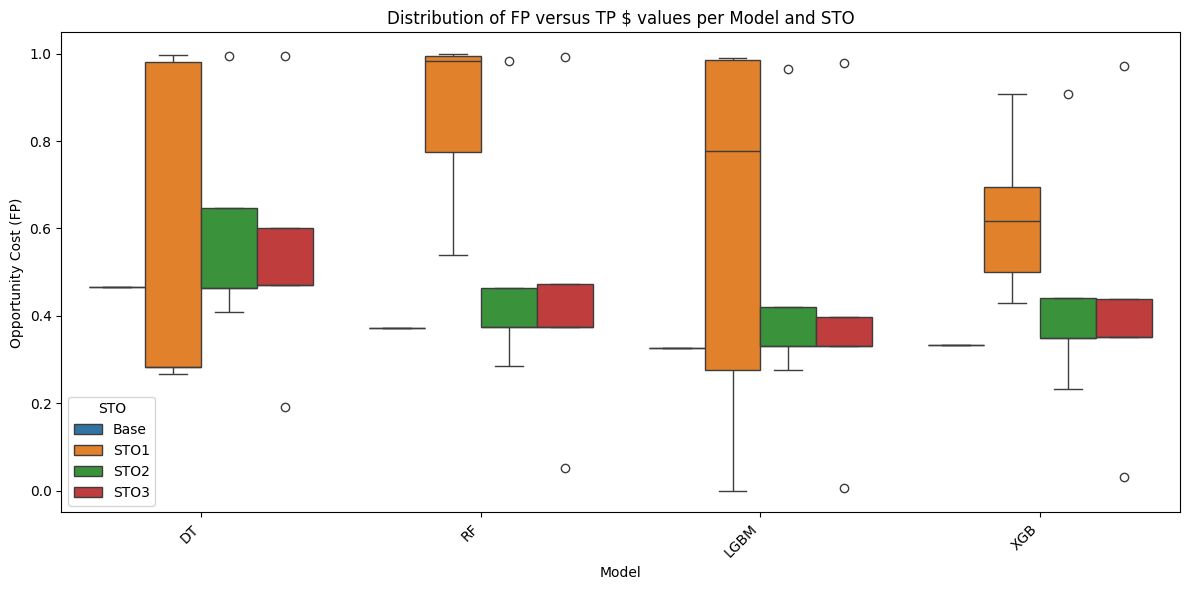

In [ ]:
# Define the order for the STO levels
sto_order = ['Base', 'STO1', 'STO2', 'STO3']

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='model', y='OpportunityCostRatio', hue='STO', data=cost_analysis_df, order=cost_analysis_df['model'].unique(), hue_order=sto_order)
plt.title('Distribution of FP versus TP $ values per Model and STO')
plt.xlabel('Model')
plt.ylabel('Opportunity Cost (FP)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/OpportunityCostRatio_perModel.pdf')
plt.show()


<Axes: xlabel='STO', ylabel='Cost Value'>

Text(0.5, 1.0, 'Distribution of TP, TN, FP, and FN $ values per STO')

Text(0.5, 0, 'STO')

Text(0, 0.5, 'Cost Value')

([0, 1, 2, 3],
 [Text(0, 0, 'Base'),
  Text(1, 0, 'STO1'),
  Text(2, 0, 'STO2'),
  Text(3, 0, 'STO3')])

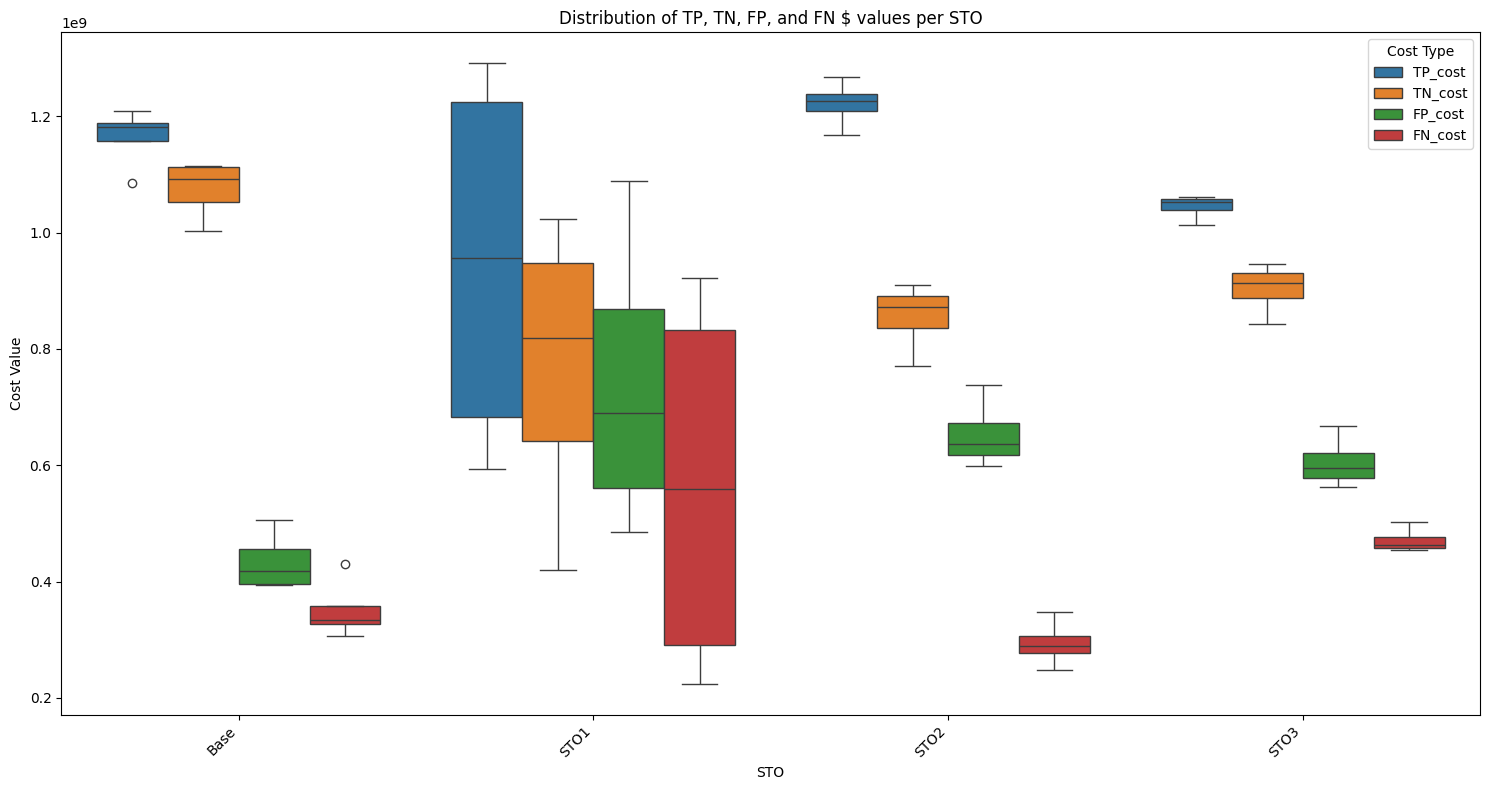

In [ ]:
grouped_cost = cost_analysis_df.groupby(['model', 'STO'])[['TP_cost', 'TN_cost', 'FP_cost', 'FN_cost']].mean().reset_index()

# Melt the DataFrame to long format for plotting
melted_cost = pd.melt(grouped_cost, id_vars=['model', 'STO'], value_vars=['TP_cost', 'TN_cost', 'FP_cost', 'FN_cost'], var_name='Cost Type', value_name='Cost Value')

# Create the plot
fig, axes = plt.subplots(figsize=(15, 8))
sns.boxplot(x='STO', y='Cost Value', hue='Cost Type', data=melted_cost, dodge=True)
plt.title('Distribution of TP, TN, FP, and FN $ values per STO')
plt.xlabel('STO')
plt.ylabel('Cost Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cost Type')

plt.tight_layout()
fig.savefig('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/STO_ConfusionMatrixValues.pdf')
plt.show()


<Figure size 1500x800 with 0 Axes>

<Axes: xlabel='model', ylabel='Cost Value'>

Text(0.5, 1.0, 'Distribution of TP_cost, TN_cost, FP_cost, and FN_cost for each Model and STO')

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Cost Value')

([0, 1, 2, 3],
 [Text(0, 0, 'DT'), Text(1, 0, 'LGBM'), Text(2, 0, 'RF'), Text(3, 0, 'XGB')])

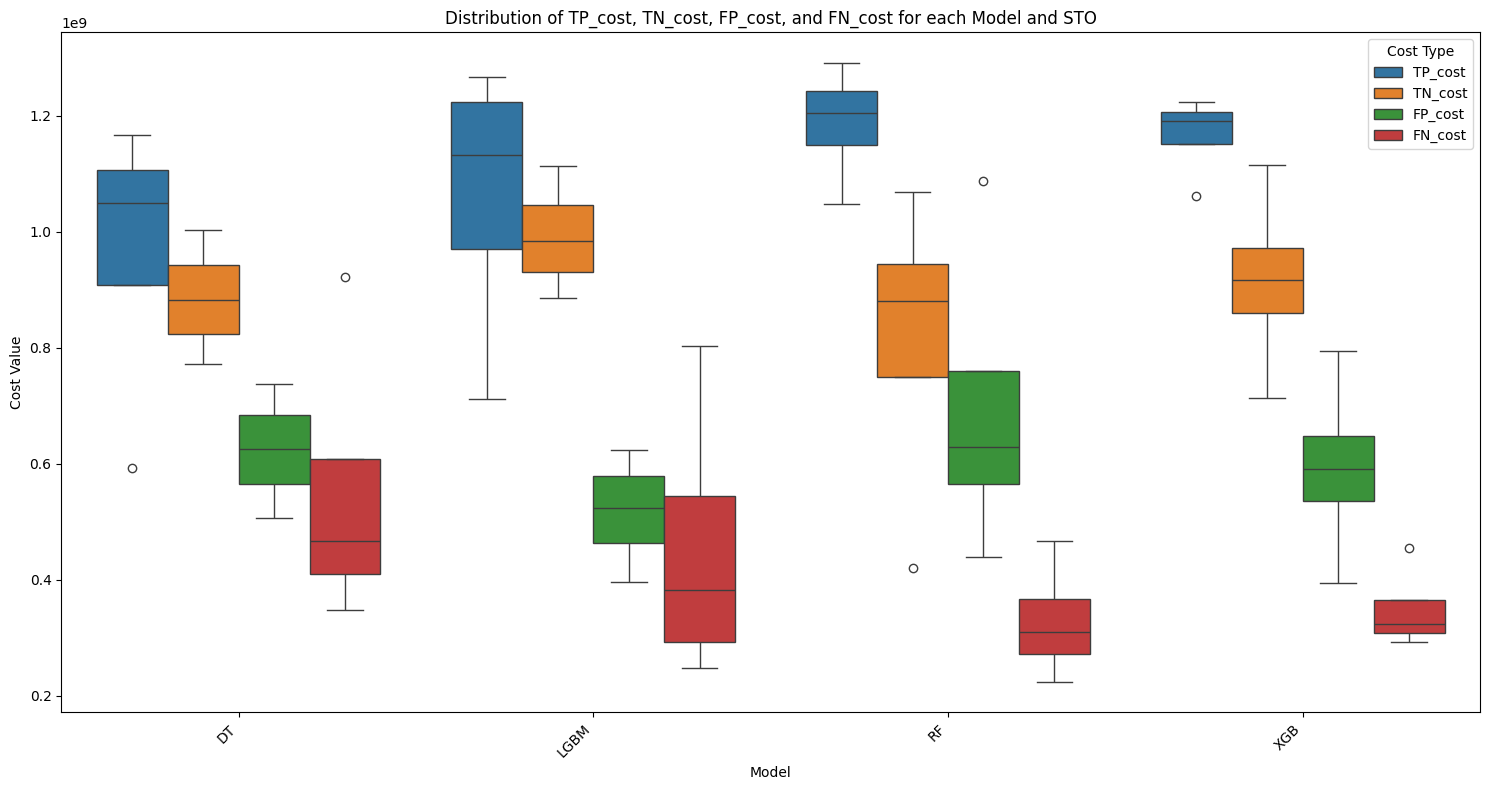

In [ ]:
grouped_cost = cost_analysis_df.groupby(['model', 'STO'])[['TP_cost', 'TN_cost', 'FP_cost', 'FN_cost']].mean().reset_index()

# Melt the DataFrame to long format for plotting
melted_cost = pd.melt(grouped_cost, id_vars=['model', 'STO'], value_vars=['TP_cost', 'TN_cost', 'FP_cost', 'FN_cost'], var_name='Cost Type', value_name='Cost Value')

# Create the plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='model', y='Cost Value', hue='Cost Type', data=melted_cost, dodge=True)
plt.title('Distribution of TP_cost, TN_cost, FP_cost, and FN_cost for each Model and STO')
plt.xlabel('Model')
plt.ylabel('Cost Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cost Type')
plt.tight_layout()
plt.show()

In [ ]:
summary_stats_per_STO_base = cost_analysis_df.groupby(['STO', 'model']).agg({
    'TP': ['mean', 'std', 'min', 'max'],
    'TP_cost': ['mean', 'std', 'min', 'max'],
    'TN': ['mean', 'std', 'min', 'max'],
    'TN_cost': ['mean', 'std', 'min', 'max'],
    'FP': ['mean', 'std', 'min', 'max'],
    'FP_cost': ['mean', 'std', 'min', 'max'],
    'FN': ['mean', 'std', 'min', 'max'],
    'FN_cost': ['mean', 'std', 'min', 'max'],
    'LGD': ['mean', 'std', 'min', 'max'],
    'ActualRevenue': ['mean', 'std', 'min', 'max'],
    'RevenueLossRatio': ['mean', 'std', 'min', 'max'],
    'OpportunityCostRatio': ['mean', 'std', 'min', 'max']
})
summary_stats_per_STO_base

TP                                       TP_cost  \
               mean           std      min      max          mean   
STO  model                                                          
Base DT     34330.0           NaN  34330.0  34330.0  1.085815e+09   
     LGBM   38210.0           NaN  38210.0  38210.0  1.208679e+09   
     RF     37514.0           NaN  37514.0  37514.0  1.182764e+09   
     XGB    37288.0           NaN  37288.0  37288.0  1.180665e+09   
STO1 DT     18726.4  25566.812821     59.0  47733.0  5.934088e+08   
     LGBM   22505.2  20673.270513      6.0  47074.0  7.117115e+08   
     RF     40704.0  13443.777687  16808.0  47804.0  1.290945e+09   
     XGB    37882.2   8888.327554  28637.0  47711.0  1.201767e+09   
STO2 DT     36886.0   6960.416582  29422.0  47787.0  1.167403e+09   
     LGBM   40047.4   4943.618493  34398.0  47793.0  1.268052e+09   
     RF     38902.0   6161.664467  30677.0  47797.0  1.228253e+09   
     XGB    38603.4   6951.811620  28300.0  47711.0  1.223389e+09   
STO3 DT     31954.2  17739.220437   1752.0  47787.0  1.012767e+09   
     LGBM   33363.8  18952.177783    141.0  47797.0  1.056271e+09   
     RF     33149.6  18911.351824    135.0  47804.0  1.048096e+09   
     XGB    33507.8  18934.505835    317.0  47788.0  1.061338e+09   

                                                           TN                \
                     std           min           max     mean           std   
STO  model                                                                    
Base DT              NaN  1.085815e+09  1.085815e+09  31777.0           NaN   
     LGBM            NaN  1.208679e+09  1.208679e+09  35602.0           NaN   
     RF              NaN  1.182764e+09  1.182764e+09  34105.0           NaN   
     XGB             NaN  1.180665e+09  1.180665e+09  35466.0           NaN   
STO1 DT     8.099403e+08  2.099674e+06  1.513584e+09  29477.6  25603.159030   
     LGBM   6.533272e+08  2.557018e+05  1.490451e+09  32639.6  16547.762320   
     RF     4.240671e+08  5.373542e+08  1.515527e+09  13460.2  13959.512911   
     XGB    2.808631e+08  9.091019e+08  1.512304e+09  22875.4  12957.525547   
STO2 DT     2.229737e+08  9.278942e+08  1.515088e+09  24527.6  14539.146529   
     LGBM   1.574326e+08  1.088103e+09  1.515293e+09  28340.0  15288.718749   
     RF     1.976704e+08  9.659845e+08  1.515341e+09  27397.0  15377.523256   
     XGB    2.196870e+08  8.989176e+08  1.512304e+09  28985.0  14341.981680   
STO3 DT     5.626384e+08  5.542532e+07  1.515088e+09  26846.0  17453.363931   
     LGBM   6.000428e+08  4.750078e+06  1.515366e+09  30182.8  17628.427616   
     RF     5.983412e+08  4.659069e+06  1.515527e+09  28783.4  17678.102466   
     XGB    5.998989e+08  1.014901e+07  1.515158e+09  29463.6  17288.670172   

            ... ActualRevenue               RevenueLossRatio            \
            ...           min           max             mean       std   
STO  model  ...                                                          
Base DT     ...  7.448263e+08  7.448263e+08         0.257145       NaN   
     LGBM   ...  9.289554e+08  9.289554e+08         0.165407       NaN   
     RF     ...  8.699406e+08  8.699406e+08         0.186666       NaN   
     XGB    ...  9.142221e+08  9.142221e+08         0.180172       NaN   
STO1 DT     ...  2.423834e+07  6.002735e+08         0.491533  0.249136   
     LGBM   ...  2.434721e+08  9.518852e+08         0.411669  0.266224   
     RF     ...  0.000000e+00  6.842262e+08         0.186942  0.280220   
     XGB    ...  1.331502e+08  7.669930e+08         0.196833  0.155887   
STO2 DT     ...  1.577208e+04  7.774526e+08         0.402184  0.303862   
     LGBM   ...  4.558731e+07  9.518852e+08         0.134459  0.078568   
     RF     ...  1.930889e+07  9.044129e+08         0.159087  0.095337   
     XGB    ...  1.331502e+08  9.289880e+08         0.156587  0.096287   
STO3 DT     ...  1.577208e+04  7.405249e+08         0.442420  0.321425   
     LGBM   ...  2.

In [ ]:
summary_stats_per_STO_base.to_csv('/content/drive/My Drive/Colab Notebooks/CreditFairness/HomeCreditStability/Results/summary_stats_per_STO_base.csv')